In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [5]:
data = pd.read_csv("Mall_Customers.csv")

In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis

### How many rows/columns are there?

In [7]:
data.shape

(200, 5)

### How many customers are there?

In [8]:
data['CustomerID'].nunique()

200

This means, we have 200 unique customer IDs

### How many of each gender type are there?

In [9]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

This means, there are more female than male in our dataset.

### How does the annual income distribution of our customers look like?

Descriptive Statistics

In [10]:
data['Annual Income (k$)'].describe(np.arange(0.1, 1, 0.1))

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
10%       23.900000
20%       37.800000
30%       46.000000
40%       54.000000
50%       61.500000
60%       67.000000
70%       74.300000
80%       78.200000
90%       93.400000
max      137.000000
Name: Annual Income (k$), dtype: float64

The annual income ranges from 15 to 137 with an average (median) annual income is 61 k$.

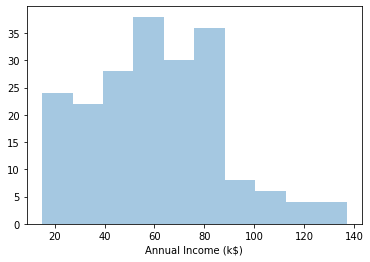

In [11]:
sns.distplot(data['Annual Income (k$)'], kde=False)

### How does the spending score distribution look like?

In [12]:
data['Spending Score (1-100)'].describe(np.arange(0.1, 1, 0.1))

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
10%       13.000000
20%       26.000000
30%       40.000000
40%       45.600000
50%       50.000000
60%       55.000000
70%       61.600000
80%       75.000000
90%       87.100000
max       99.000000
Name: Spending Score (1-100), dtype: float64

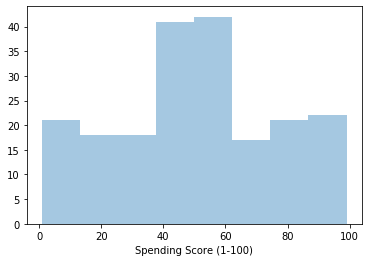

In [13]:
sns.distplot(data['Spending Score (1-100)'], kde=False)

Spend score is pretty much normally distributed.

# Clustering

In [14]:
from sklearn.cluster import KMeans

In [43]:
# Get features we need
# trial 1: 2 features only
# features = ['Annual Income (k$)', 'Spending Score (1-100)']
# X = data[features]


# trial 2: 3 features
features = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
X = data[features]

# Convert categorical to numeric
# X = pd.get_dummies(X_raw)
# X_raw.head()

X.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [38]:
!pip install hvplot

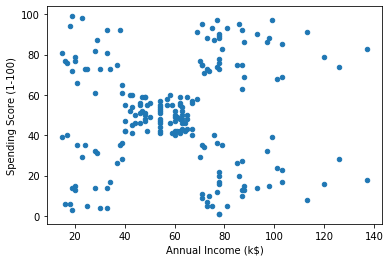

In [16]:
# If you have 2 features, you can plot it on a 2D scatter plot

# if more than 2 features, it's not plottable like this

X.plot.scatter('Annual Income (k$)', 'Spending Score (1-100)')

### Choosing Optimal *k*

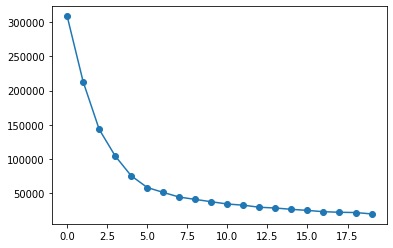

In [44]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

Using the elbow method, I decided to use *k=5*.

In [45]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters = 5, random_state = 42) #what is this for? How do you choose 42?

# Fit data to model
km.fit(X) #there's no Y because unsupervised learning

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [46]:
new_data.head()

,Annual Income (k$),Spending Score (1-100),Age,labels
0,15,39,19,0
1,15,81,21,4
2,16,6,20,0
3,16,77,23,4
4,17,40,31,0


### Plot Centers and labels

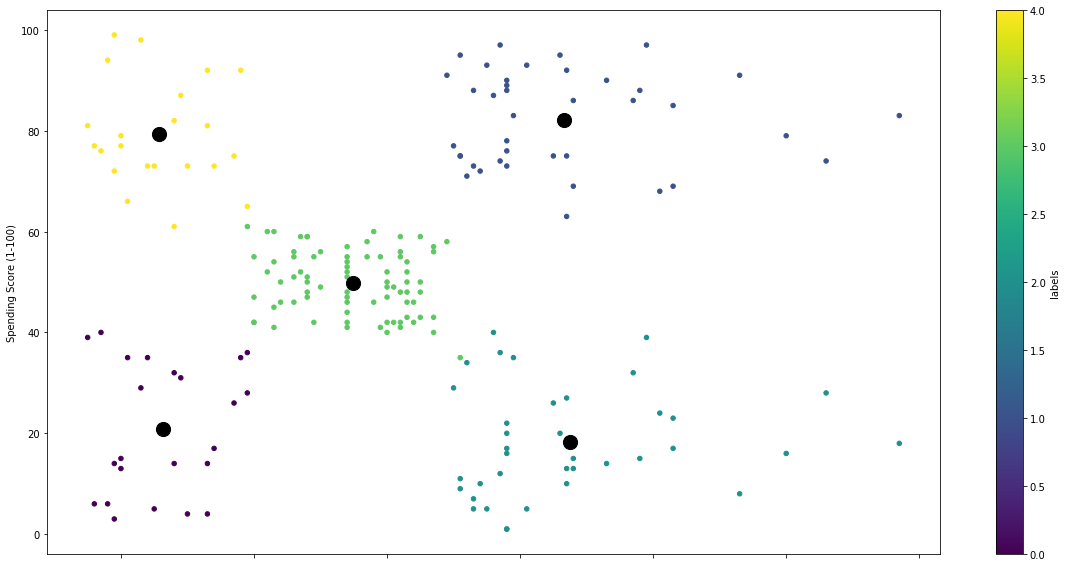

In [47]:
# Plot data points and colorize based on label
new_data.plot.scatter(x='Annual Income (k$)', 
                      y='Spending Score (1-100)', 
                      c='labels', 
                      cmap='viridis',
                      figsize=(20, 10))

# Get cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], s=200, color='black
            
#question: how come if 3 feaures, the colored clustering graph still works? what's in the x axis?

# Deep Dive to each cluster

In [48]:
#what's the difference among the clusters? Explain.

#python starts clusters with 0
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()


#in clusters, you have to ambiguously label them. Be creative like "Average Joe"

,Annual Income (k$),Spending Score (1-100),Age,labels
count,23.000000,23.000000,23.000000,23.0
mean,26.304348,20.913043,45.217391,0.0
std,7.893811,13.017167,13.228607,0.0
min,15.000000,3.000000,19.000000,0.0
25%,19.500000,9.500000,35.500000,0.0
50%,25.000000,17.000000,46.000000,0.0
75%,33.000000,33.500000,53.500000,0.0
max,39.000000,40.000000,67.000000,0.0


Cluster 0: Medium Income & Medium Spend

If 3 features (income, spending score, age):

Cluster 0: The tawid-gutom ninongs and ninangs: Low income, Low spend, Mid-life crisis

In [49]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,39.000000,39.000000,39.000000,39.0
mean,86.538462,82.128205,32.692308,1.0
std,16.312485,9.364489,3.728650,0.0
min,69.000000,63.000000,27.000000,1.0
25%,75.500000,74.500000,30.000000,1.0
50%,79.000000,83.000000,32.000000,1.0
75%,95.000000,90.000000,35.500000,1.0
max,137.000000,97.000000,40.000000,1.0


Cluster 1: High Income & Low Spend

If 3 features (income, spending score, age):

Cluster 1: The Waldas Yuppies: High income, High Spend, 32 yrs

In [50]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,37.000000,37.000000,37.000000,37.0
mean,87.432432,18.189189,40.324324,2.0
std,16.272916,10.715611,11.525465,0.0
min,70.000000,1.000000,19.000000,2.0
25%,77.000000,10.000000,34.000000,2.0
50%,81.000000,16.000000,41.000000,2.0
75%,97.000000,26.000000,47.000000,2.0
max,137.000000,40.000000,59.000000,2.0


Cluster 2: Low Income & Low Spend

If 3 features (income, spending score, age):
Cluster 2: The investor titos and titas: High income, Low Spend, Mid-life crisis

In [51]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,79.000000,79.000000,79.000000,79.0
mean,54.822785,49.835443,43.126582,3.0
std,8.576592,6.276595,16.446781,0.0
min,39.000000,35.000000,18.000000,3.0
25%,48.000000,45.500000,27.000000,3.0
50%,54.000000,50.000000,47.000000,3.0
75%,62.000000,55.000000,54.500000,3.0
max,71.000000,61.000000,70.000000,3.0


Cluster 3: Low Income & High Spend

If 3 features (income, spending score, age):
Cluster 3: The saktong ninongs and ninangs: Mid income, mid spend, mid-life crisis

In [52]:
# Cluster 4
cluster_4 = new_data[new_data['labels']==4]
cluster_4.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,22.000000,22.000000,22.000000,22.0
mean,25.727273,79.363636,25.272727,4.0
std,7.566731,10.504174,5.257030,0.0
min,15.000000,61.000000,18.000000,4.0
25%,19.250000,73.000000,21.250000,4.0
50%,24.500000,77.000000,23.500000,4.0
75%,32.250000,85.750000,29.750000,4.0
max,39.000000,99.000000,35.000000,4.0


Cluster 4: High Income & High Spend

If 3 features (income, spending score, age):
Cluster 4: The Illusyonadang Millenials: Low income, High Spend, 25 yrs

# Exercise: Add more features to X and see the results of the clusters.

# Explore [Agglomerative Clustering](https://colab.research.google.com/drive/1IcjI_ac1gNipwTZv3WYYzeQNx-arqRl7)


# Homework: Perform Clustering on [Credit Card Dataset](https://drive.google.com/file/d/1EtH7Y4Y8zVcUWj9y3EnU1i7Vx2By2_LI/view?usp=sharing).